In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

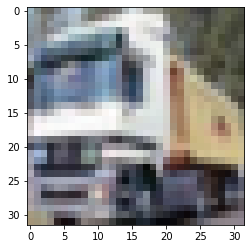

In [4]:
plt.imshow(x_train[1])

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

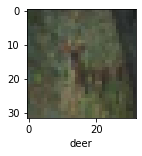

In [9]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])
plot_sample(x_train,y_train,10)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
    
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.8120 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.6261 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5438 - accuracy: 0.4532
Epoch 4/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.4825 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4334 - accuracy: 0.4953


In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [15]:
print("Classification report \n",classification_report(y_test,y_pred_classes))

Classification report 
               precision    recall  f1-score   support

           0       0.59      0.46      0.51      1000
           1       0.46      0.75      0.57      1000
           2       0.47      0.28      0.35      1000
           3       0.36      0.42      0.39      1000
           4       0.43      0.40      0.41      1000
           5       0.64      0.13      0.21      1000
           6       0.59      0.42      0.49      1000
           7       0.41      0.69      0.51      1000
           8       0.54      0.69      0.61      1000
           9       0.51      0.53      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4295 - accuracy: 0.4871
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0753 - accuracy: 0.6252
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9475 - accuracy: 0.6694
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8638 - accuracy: 0.7012
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7947 - accuracy: 0.7216
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7371 - accuracy: 0.7433
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6872 - accuracy: 0.7590
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6422 - accuracy: 0.7767
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5987 - accuracy: 0.7896
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [18]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 0.9535 - accuracy: 0.6935


[0.9534816145896912, 0.6934999823570251]